# <span style="color:red">Model Development</span>

In [233]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import re
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

from itertools import compress, product

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
sns.set()

C:\Users\43xqu\AppData\Local\Temp\ipykernel_18544\2356385666.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


60

## Câu 1: Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [234]:
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv'

In [235]:
df = pd.read_csv(url)
#df = pd.read_csv('Model_Dataset_Lab.csv')

In [236]:
df

,Unnamed: 0,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
0,23,1967,90,0.755887,0.886111,68.0,31,38,93.7,2.97,fwd,6229.0
1,4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,4wd,17450.0
2,129,2695,121,0.896684,0.923611,110.0,21,28,99.1,3.54,fwd,12170.0
3,83,2405,122,0.828448,0.908333,88.0,25,32,96.3,3.35,fwd,8189.0
4,154,2275,110,0.799135,0.894444,56.0,34,36,95.7,3.27,fwd,7898.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,167,2714,146,0.846708,0.911111,116.0,24,30,98.4,3.62,rwd,11549.0
176,102,3139,181,0.820279,0.943056,200.0,17,23,91.3,3.43,rwd,19699.0
177,94,2037,97,0.817876,0.886111,69.0,31,37,94.5,3.15,fwd,7999.0
178,193,3042,141,0.907256,0.933333,114.0,24,28,104.3,3.78,rwd,16515.0


In [237]:
# Drop đi cột đầu tiên
df.drop(df.columns[0], axis=1, inplace=True)

In [238]:
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels,price
162,2015,92,0.762614,0.883333,62.0,31,38,95.7,3.05,fwd,6488.0
150,2372,110,0.842864,0.868056,86.0,27,33,96.5,3.15,fwd,10295.0
4,2275,110,0.799135,0.894444,56.0,34,36,95.7,3.27,fwd,7898.0
105,2818,156,0.832292,0.920833,145.0,19,24,95.9,3.59,rwd,12764.0
100,2458,122,0.843825,0.923611,92.0,27,32,102.4,3.31,fwd,11248.0
41,2921,156,0.832292,0.920833,145.0,19,24,95.9,3.59,fwd,14869.0
13,3062,141,0.907256,0.956944,114.0,19,25,109.1,3.78,rwd,22625.0
114,2128,98,0.755887,0.886111,102.0,24,30,93.7,3.03,fwd,7957.0
104,2326,122,0.843825,0.923611,92.0,29,34,102.4,3.31,fwd,8948.0
93,2844,136,0.925997,0.991667,110.0,19,25,105.8,3.19,fwd,17710.0


In [239]:
df.shape

(180, 11)

__Nhận xét:__ Dataset trên có 180 sample và 11 feature

## Câu 2. Kiểm tra kiểu dữ liệu của các feature trong dataset. Dataset có bị khuyết giá trị nào không?

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   curb-weight   180 non-null    int64  
 1   engine-size   180 non-null    int64  
 2   length        180 non-null    float64
 3   width         180 non-null    float64
 4   horsepower    180 non-null    float64
 5   city-mpg      180 non-null    int64  
 6   highway-mpg   180 non-null    int64  
 7   wheel-base    180 non-null    float64
 8   bore          180 non-null    float64
 9   drive-wheels  180 non-null    object 
 10  price         180 non-null    float64
dtypes: float64(6), int64(4), object(1)
memory usage: 15.6+ KB


In [241]:
print('Tổng số lượng missing value(s): ' + str(sum(df.isnull().sum())))

Tổng số lượng missing value(s): 0


__Nhận xét:__ Dữ liệu này không có missing value

## Câu 3: Phát triển mô hình hồi quy <strong>đơn biến</strong> cho từng feature sau: `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`.

In [242]:
features_c3 = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']

In [243]:
models_c3 = []
for feature in features_c3:
    lr = LinearRegression()
    model = lr.fit(df[feature].values.reshape(-1,1), df['price'])
    score = lr.score(df[feature].values.reshape(-1,1), df['price'])
    models_c3.append([feature, model, score])

In [244]:
models_c3

[['curb-weight', LinearRegression(), 0.7052521923275914],
 ['engine-size', LinearRegression(), 0.7596584287542103],
 ['length', LinearRegression(), 0.49276779886843025],
 ['width', LinearRegression(), 0.5840854904827373],
 ['horsepower', LinearRegression(), 0.6527261021204291],
 ['city-mpg', LinearRegression(), 0.47679396946612407],
 ['highway-mpg', LinearRegression(), 0.5095276715927741],
 ['wheel-base', LinearRegression(), 0.3627626028757279],
 ['bore', LinearRegression(), 0.2772114769627062]]

__Bar plot:__

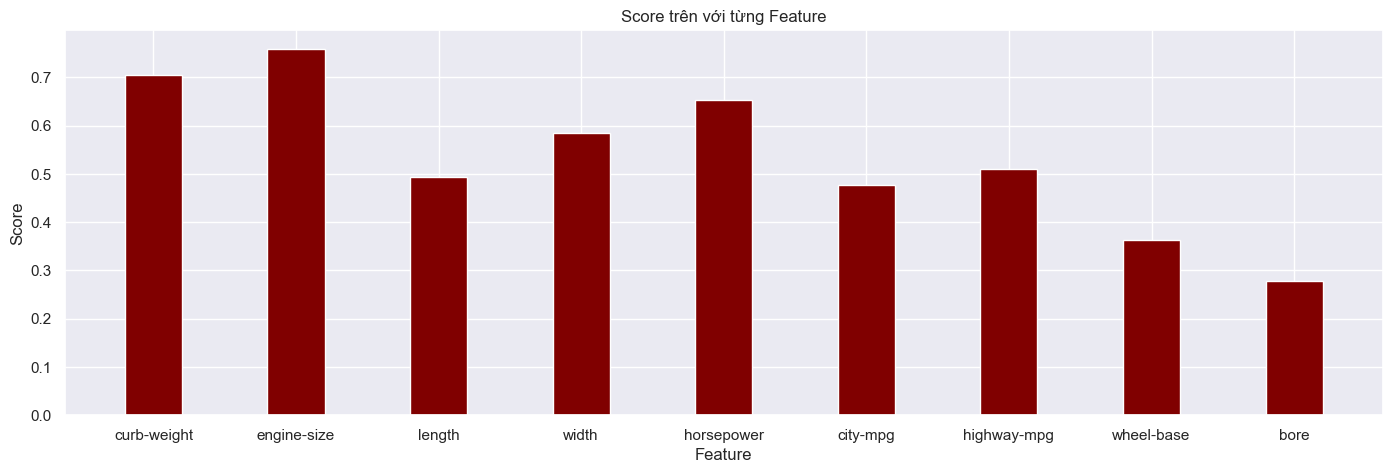

In [245]:
models_c3df = pd.DataFrame(models_c3)

fig = plt.figure(figsize = (17, 5))
plt.bar(models_c3df[0], models_c3df[2], color ='maroon', width = 0.4)
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Score trên với từng Feature")
plt.show();

__Nhận xét:__
* Thuộc tính `engine-size` có Score cao nhất trong mô hình hồi quy đơn biến, Score xấp xỉ `0.8`
* Thuộc tính `bore` có Score thấp nhất trong mô hình hồi quy đơn biến, Score xấp xỉ `0.3`

## Câu 4: Phát họa **Regression Plot** và **Residual Plot** cho các Features sau: `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`.

In [246]:
features_c4 = features_c3

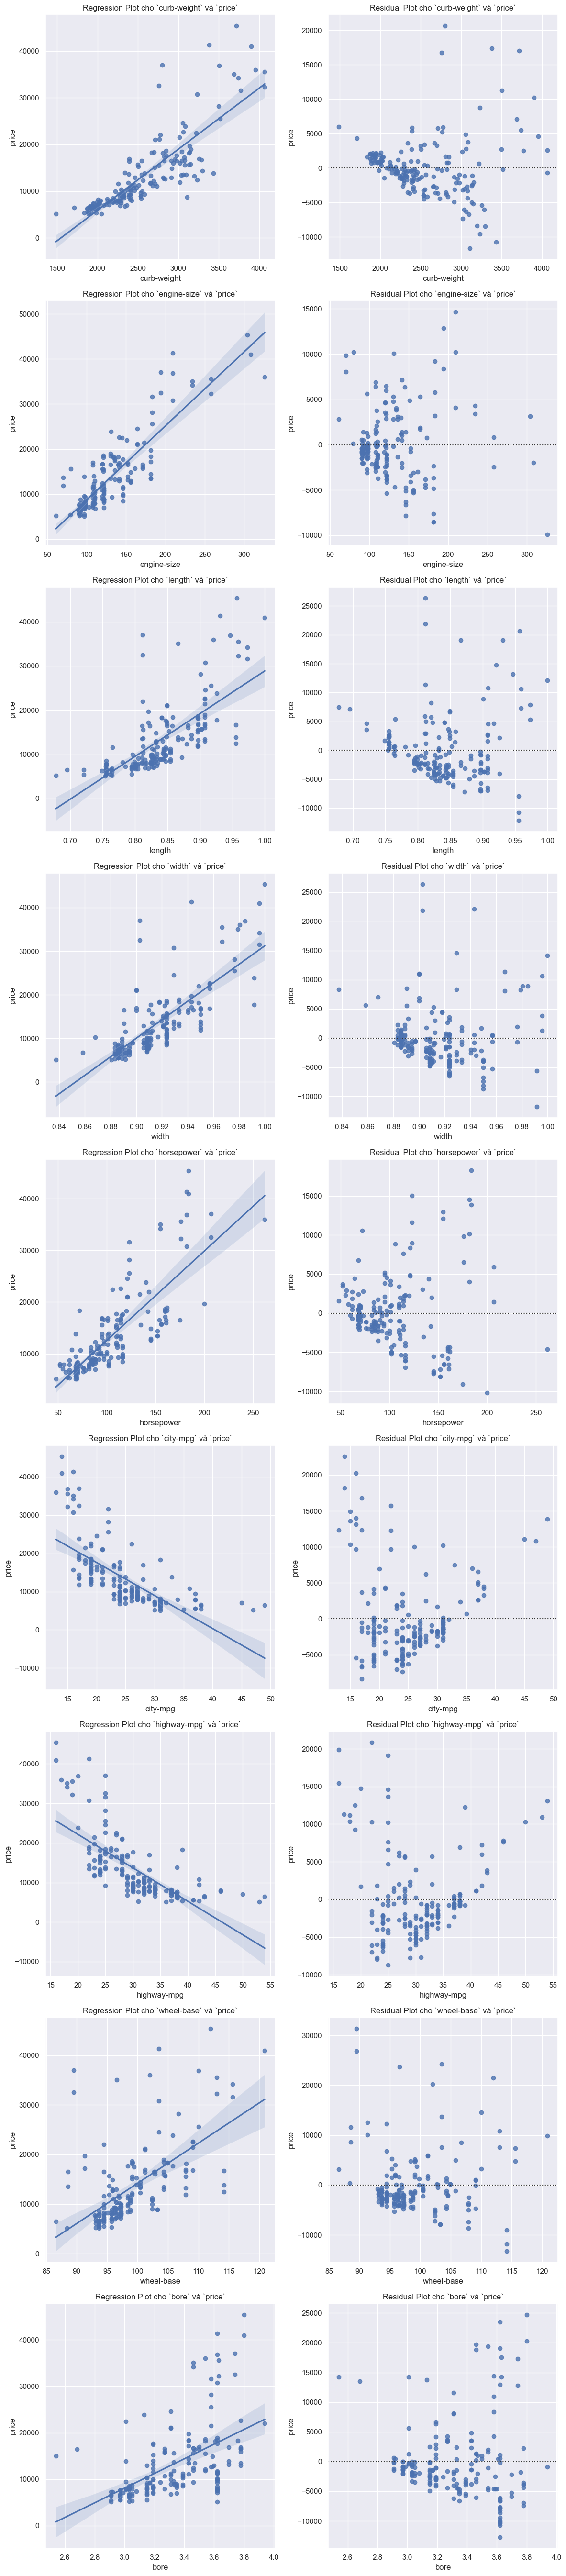

In [247]:
plt.figure(figsize=(12, len(features_c4) * 6))

for i in range(len(features_c4)):
    # Regression Plot
    plt.subplot(len(features_c4), 2, 2*i+1)
    sns.regplot(x=features_c4[i], y='price', data=df)
    plt.title('Regression Plot cho `{}` và `price`'.format(features_c4[i]))
    
    # Residual Plot
    plt.subplot(len(features_c4), 2, 2*i+2)
    sns.residplot(x=features_c4[i], y='price', data=df)
    plt.title('Residual Plot cho `{}` và `price`'.format(features_c4[i]))

plt.tight_layout()
plt.show();

## Câu 5: Dựa vào **Residual Plot** của câu 4, chuẩn đoán xem Feature nào có thể phát triển theo phương pháp hồi quy tuyến tính? Giải thích lý do.

__Nhận xét:__ Dựa vào Residual Plot của câu 4:
* Feature `engine-size`: Có thể phát triển lên mô hình hồi quy tuyến tính, vì theo **Residual Plot** thì các **Data Point** trải khá đều và ngẫu nhiên xung quanh trục **x**.
* Feature `wheel-base`: Phần nào cũng có thể phát triển lên mô hình hồi quy tuyến tính, vì theo **Residual Plot** thì các **Data Point** tương đối đều quanh trục **x** mặc dù cũng có khá nhiều **Data Point** ở đoạn **x < 100**.

## Câu 6: Xây dựng mô hình **hồi quy đa biến** cho các feature sau: `horsepower`, `curb-weight`, `engine-size`, `highway-mpg`.

In [248]:
features_c6 = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

__Mô hình n Features__:

In [249]:
def multivariables_regression_models(comb):
    # Spliting dữ liệu
    X_train = df.loc[:, comb].values
    Y_train = df.loc[:, 'price']

    # Modeling
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    score = lr.score(X_train, Y_train)

    return score

In [250]:
def combinations(items):
    return (set(compress(items, mask)) for mask in product(*[[0, 1]] * len(items)))

two_vars = [list(comb) for comb in combinations(features_c6) if len(comb) == 2]
three_vars = [list(comb) for comb in combinations(features_c6) if len(comb) == 3]
four_vars = [list(comb) for comb in combinations(features_c6) if len(comb) == 4]

__Mô hình 2 biến:__

In [251]:
for c in two_vars:
    print('Score cho mô hình `' + c[0] + '` và `' + c[1] + "` là: ", end="")
    print(multivariables_regression_models(c))

Score cho mô hình `highway-mpg` và `engine-size` là: 0.7821397524512739
Score cho mô hình `curb-weight` và `highway-mpg` là: 0.7080665644477686
Score cho mô hình `curb-weight` và `engine-size` là: 0.7932436538138823
Score cho mô hình `horsepower` và `highway-mpg` là: 0.6620354167205591
Score cho mô hình `horsepower` và `engine-size` là: 0.7821155304171414
Score cho mô hình `curb-weight` và `horsepower` là: 0.764747470647298


__Mô hình 3 biến:__

In [252]:
for c in three_vars:
    print('Score cho mô hình `' + c[0] + '`, `' + c[1] + "` và `" + c[2] + "` là: ", end="")
    print(multivariables_regression_models(c))

Score cho mô hình `curb-weight`, `highway-mpg` và `engine-size` là: 0.7959861376876213
Score cho mô hình `horsepower`, `highway-mpg` và `engine-size` là: 0.7879013177119579
Score cho mô hình `curb-weight`, `horsepower` và `highway-mpg` là: 0.7707318127259486
Score cho mô hình `curb-weight`, `horsepower` và `engine-size` là: 0.8050272314190563


__Mô hình 4 biến:__

In [253]:
for c in four_vars:
    print('Score cho mô hình `' + c[0] + '`, `' + c[1] + "`, `" + c[2] + "` và `" + c[3] + " là: ", end="")
    print(multivariables_regression_models(c))

Score cho mô hình `curb-weight`, `horsepower`, `highway-mpg` và `engine-size là: 0.8051642535047185


## Câu 7: Xây dựng mô hình **hồi quy đa biến** cho các feature sau: `horsepower`, `highway-mpg`

In [254]:
X_train_c7 = df.loc[:, ['horsepower', 'highway-mpg']].values
Y_train_c7 = df.loc[:,'price']

In [255]:
lr = LinearRegression()
lr.fit(X_train_c7, Y_train_c7)

LinearRegression()

In [256]:
print('Score cho mô hình `horsepower` và `highway-mpg` là: ' + str(lr.score(X_train_c7, Y_train_c7)))

Score cho mô hình `horsepower` và `highway-mpg` là: 0.6620354167205591


## Câu 8: Xây dựng mô hình **hồi quy đa biến** cho các Features được cho là quan trọng.

### a. Trích xuất các biến quan trọng

__Feature kiểu số (Numeric):__

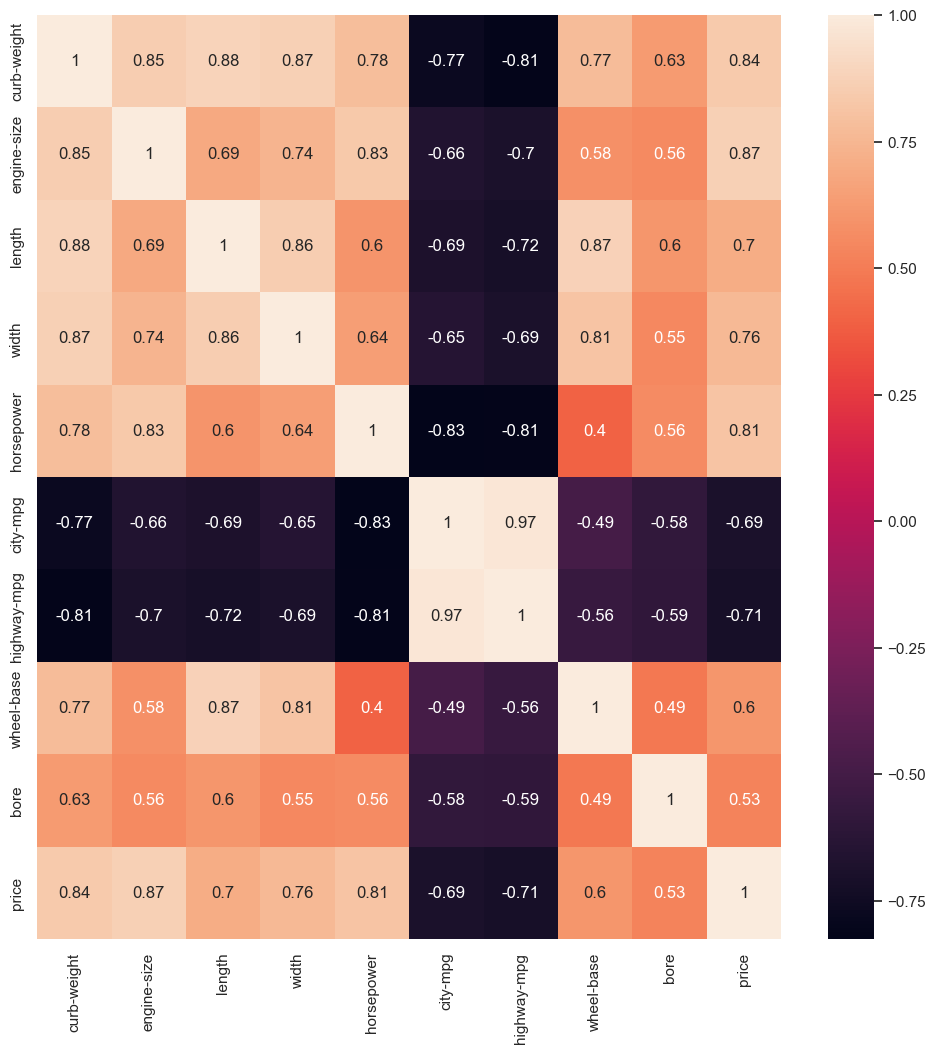

In [257]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)
plt.show();

__Nhận xét:__ Xét 2 mức tương quan của các biến ở dạng số:
* __Cao (Strong)__ nằm trong đoạn $r \geq 0.8$ hoặc $r \leq -0.8$ gồm: `curb-weight`, `engine-size`, `horsepower`
* __Trung bình (Moderate)__ nằm trong đoạn $0.5 \leq r < 0.8$ hoặc $ -0.5 \leq r < -0.8$ gồm: `length`, `width`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`
<hr> $\Rightarrow$ Các features được cho là quan trọng nếu các features đó có độ tương quan cao.

In [258]:
important_features_c8 = ['curb-weight', 'engine-size', 'horsepower']

__Feature kiểu phân loại (Categorical):__

In [259]:
df_drive_wheels = df[['drive-wheels', 'price']]
df_groupby_drive_wheels = df_drive_wheels.groupby(['drive-wheels'], as_index=False)
df_groupby_drive_wheels.mean()

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9281.009615
2,rwd,19779.294118


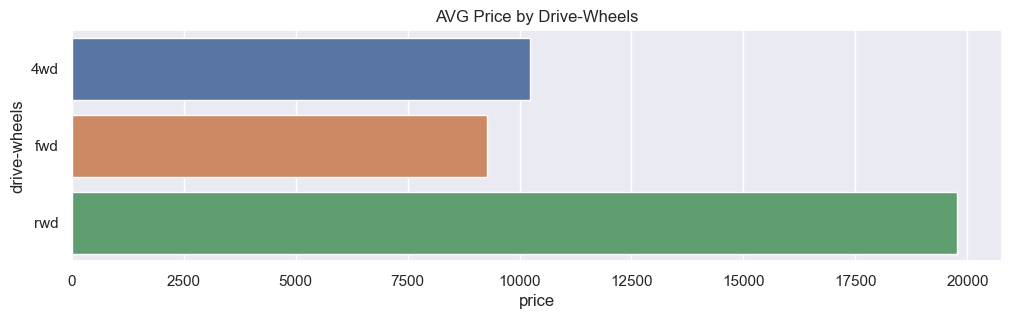

In [260]:
plt.figure(figsize=(12, 3))
sns.barplot(x='price', y='drive-wheels', data=df_groupby_drive_wheels.mean())
plt.title('AVG Price by Drive-Wheels');

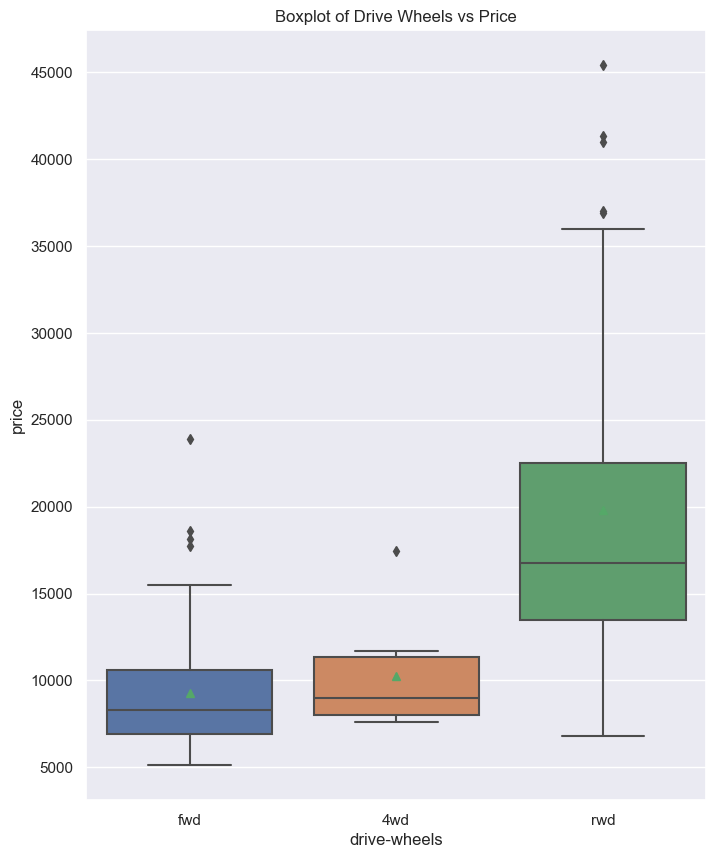

In [261]:
plt.figure(figsize=(8, 10))
sns.boxplot(x='drive-wheels', y='price', data=df, showmeans=True)
plt.title('Boxplot of Drive Wheels vs Price')
plt.show();

In [262]:
f_test, p_value = stats.f_oneway(df_groupby_drive_wheels.get_group('rwd')['price'],
                                 df_groupby_drive_wheels.get_group('fwd')['price'],
                                 df_groupby_drive_wheels.get_group('4wd')['price'])

print('F-test: ', f_test)
print('P-value: ', p_value)

F-test:  59.555271835204664
P-value:  1.6671183406285857e-20


__Nhận xét:__ Giá trị <strong>P-Value = 1.6671183406285857e-20 < 0.05</strong>: Có ý nghĩa thống kê, do đó có sự khác biệt `price` giữa các nhóm trong `drive-wheels`.<br>
$\Rightarrow$ `drive-wwheels` cũng là 1 Feature quan trọng.

In [263]:
important_features_c8 = important_features_c8 + ['drive-wheels']

In [264]:
print('Các biến quan trọng là:', important_features_c8)

Các biến quan trọng là: ['curb-weight', 'engine-size', 'horsepower', 'drive-wheels']


## b. Tiền xử lý dữ liệu:

In [265]:
X_train_c8 = df[important_features_c8]
Y_train_c8 = df[['price']]

__Mã hóa thuộc tính `drive-wheels` thành vector 3 cột 0, 1:__

In [266]:
one_hot = pd.get_dummies(X_train_c8['drive-wheels'])
one_hot

,4wd,fwd,rwd
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
175,0,0,1
176,0,0,1
177,0,1,0
178,0,0,1


In [267]:
X_train_c8 = X_train_c8.drop('drive-wheels',axis = 1)
X_train_c8 = X_train_c8.join(one_hot)

In [268]:
X_train_c8

,curb-weight,engine-size,horsepower,4wd,fwd,rwd
0,1967,90,68.0,0,1,0
1,2824,136,115.0,1,0,0
2,2695,121,110.0,0,1,0
3,2405,122,88.0,0,1,0
4,2275,110,56.0,0,1,0
...,...,...,...,...,...,...
175,2714,146,116.0,0,0,1
176,3139,181,200.0,0,0,1
177,2037,97,69.0,0,1,0
178,3042,141,114.0,0,0,1


## c. Xây dựng mô hình:

In [269]:
lr_c8 = LinearRegression()
lr_c8.fit(X_train_c8, Y_train_c8)

LinearRegression()

In [270]:
score_c8 = lr_c8.score(X_train_c8, Y_train_c8)
print('Mô hình có Score: ', score_c8)

Mô hình có Score:  0.8120438500866125


## **Câu 9**: Phát họa **Distribution Plot** và **Residual Plot** thể hiện giữa giá trị thực và giá trị dự đoán từ các mô hình đã xây dựng (Câu 8).

In [271]:
X_test = df[important_features_c8]
one_hot = pd.get_dummies(X_test['drive-wheels'])
X_test = X_test.drop('drive-wheels',axis = 1)
X_test = X_test.join(one_hot)

In [272]:
X_test

,curb-weight,engine-size,horsepower,4wd,fwd,rwd
0,1967,90,68.0,0,1,0
1,2824,136,115.0,1,0,0
2,2695,121,110.0,0,1,0
3,2405,122,88.0,0,1,0
4,2275,110,56.0,0,1,0
...,...,...,...,...,...,...
175,2714,146,116.0,0,0,1
176,3139,181,200.0,0,0,1
177,2037,97,69.0,0,1,0
178,3042,141,114.0,0,0,1


In [273]:
Y_actual = df['price']
Y_predicted = lr_c8.predict(X_test)

C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\43xqu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


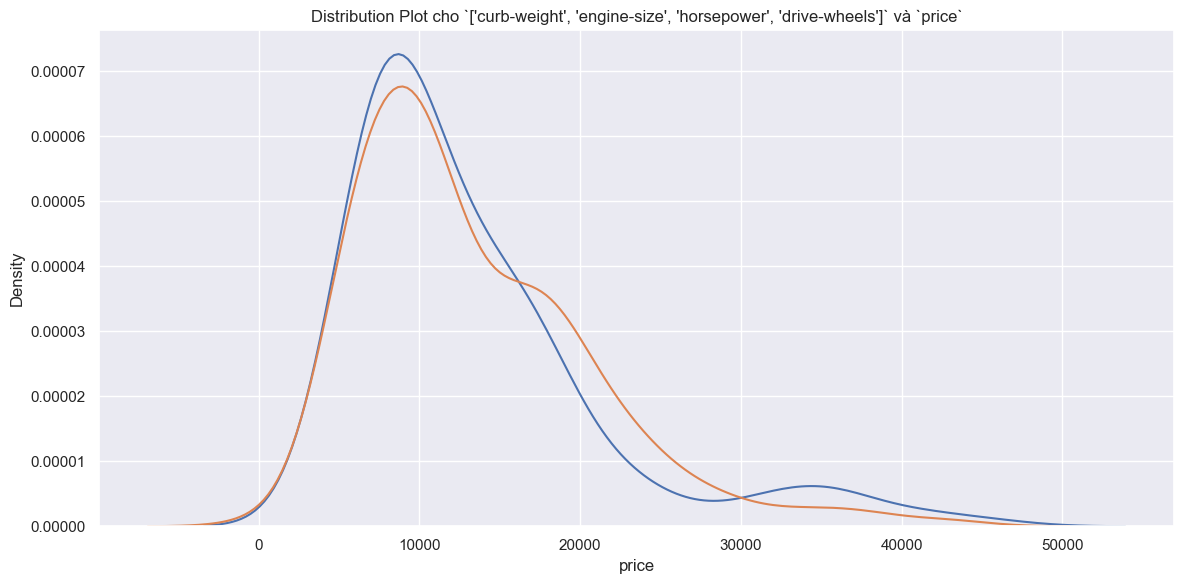

In [274]:
plt.figure(figsize=(12, 6))
sns.distplot(Y_actual, hist=False, label='Giá trị thực tế')
sns.distplot(Y_predicted, hist=False, label='Giá trị tiên đoán')
plt.title('Distribution Plot cho `' + str(important_features_c8) + '` và `price`')
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show();

## Câu 11: Viết hàm trả về kết quả dự đoán từ một hoặc nhiều Features thuộc `curb-weight`, `engine-size`, `length`, `width`, `horsepower`, `city-mpg`, `highway-mpg`, `wheel-base`, `bore`.

In [275]:
features_c11 = ['curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore']
features_c11.sort()

In [276]:
def get_all_combinations(lst, n):
    if n == 0:
        return [[]]
    l =[]
    for i in range(0, len(lst)):
        m = lst[i]
        remLst = lst[i + 1:]
        remainlst_combo = get_all_combinations(remLst, n-1)
        for p in remainlst_combo:
             l.append([m, *p])
                
    return l

def train_model(*features):
    X_train = df[features[0]].values
    Y_train = df['price']
    lr = LinearRegression()
    model = lr.fit(X_train, Y_train)
    score = lr.score(X_train, Y_train)
    
    return (model, score)

combs = []
for k in range(1, len(features_c11) + 1):
    comb = get_all_combinations(features_c11, k)
    combs = combs + comb

def all_model(features_list):
    feature_to_model_mapping = dict()
    for comb in combs:
        feature_to_model_mapping[str(comb)] = train_model(comb)
    
    return feature_to_model_mapping

In [277]:
features_to_models = all_model(features_c11)

In [278]:
def input_features(text):
    inp = text.split(' ')
    features = []
    for i in inp:
        if i.isnumeric():
            features = features + [features_c11[int(i)]]
    features.sort()
    return features

In [279]:
def predict__(model, features):
    X_test = df[features]
    Y_predicted = model.predict(X_test)
    
    return Y_predicted

__Thực hiện nhập features và xuất giá trị:__
* Input được nhập vào ở dạng các số cách nhau bởi các khoảng trắng
* Các giá trị được chấp nhận:
    * 0: `bore`
    * 1: `city-mpg`
    * 2: `curb-weight`
    * 3: `engine-size`
    * 4: `highway-mpg`
    * 5: `horsepower`
    * 6: `length`
    * 7: `wheel-base`
    * 8: `width`
* Ví dụ: Nhập vào là `0 1 4` kết quả input sẽ là [`bore`, `city-mpg`, `highway-mpg`]

In [283]:
input_feas = input_features(input('Nhập vào index các features:'))

print('Features bạn nhập là: ', input_feas)

model = features_to_models[str(input_feas)][0]
score = features_to_models[str(input_feas)][1]

print('Giá trị Score: ', score)
print('Giá trị Y tiên đoán: \n', predict__(model, input_feas))

Nhập vào index các features: 0 5 1 2


Features bạn nhập là:  ['bore', 'city-mpg', 'curb-weight', 'horsepower']
Giá trị Score:  0.7721805682060084
Giá trị Y tiên đoán: 
 [ 5457.02597602 15659.10059456 14170.94468074 10125.06792316
  7378.14292868 22303.30944942 11034.14637801  6124.74768764
  6673.28123978  5897.8784345   5959.95728956 17530.99632783
 31493.44478355 17410.12519984 10483.81661429  1979.55585939
 10955.23616663 20074.77987311  5457.02597602  8877.54047232
 23134.57036219  5802.73307849  9252.52130196 13808.68584714
 27193.79152064 20001.83433562 16758.97661057  5194.7958915
  8309.85269888 14184.74461809 29764.90927119  5681.97670852
  5487.06508985 15227.64107109 16082.76387153  6967.42059726
  7687.92340208  9751.33051508 15568.87493542  4774.34130741
  4788.1532475  19465.33430827 11152.12282666  9127.72082993
 23050.36968814  9682.31932125 27707.68045675  8539.08441221
  5732.32340916  5194.28430911 18478.27938774  6050.56429434
  5119.04812138 20902.61320001 17592.61117272  6594.4061579
  6332.78997224  

C:\Users\43xqu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
